In [1]:
from torchvision import datasets
from pathlib import Path

In [2]:
data_path = "../data-unversioned/p1ch7/"
download = not Path(data_path).exists()
cifar10 = datasets.CIFAR10(data_path, train=True, download=download)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=download)

In [3]:
type(cifar10).mro() # 상속관계 확인

[torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object]

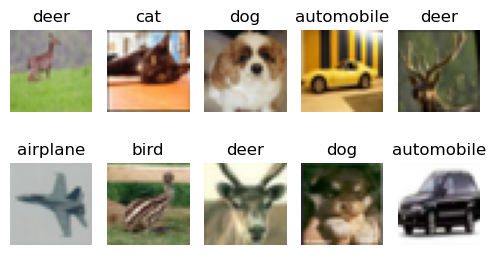

In [5]:
# 데이터 확인
import matplotlib.pyplot as plt
import random

class_names = cifar10.classes # 클래스 이름
N = 10                        # 확인할 데이터수

plt.figure(figsize=(5,3))
for i in range(1,N+1):
    sample_ix = random.sample(range(len(cifar10)), 1)[0]
    img, label = cifar10[sample_ix]

    plt.subplot(2, 5, i)
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis('off')

plt.tight_layout()

In [6]:
# 이미지 transforms
from torchvision import transforms

In [7]:
dir(transforms)[:10]

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur']

In [8]:
foo = 'var'

`AutoAugment`는 뭐지?

In [9]:
print(transforms.AutoAugment.__doc__)

AutoAugment data augmentation method based on
    `"AutoAugment: Learning Augmentation Strategies from Data" <https://arxiv.org/pdf/1805.09501.pdf>`_.
    If the image is torch Tensor, it should be of type torch.uint8, and it is expected
    to have [..., 1 or 3, H, W] shape, where ... means an arbitrary number of leading dimensions.
    If img is PIL Image, it is expected to be in mode "L" or "RGB".

    Args:
        policy (AutoAugmentPolicy): Desired policy enum defined by
            :class:`torchvision.transforms.autoaugment.AutoAugmentPolicy`. Default is ``AutoAugmentPolicy.IMAGENET``.
        interpolation (InterpolationMode): Desired interpolation enum defined by
            :class:`torchvision.transforms.InterpolationMode`. Default is ``InterpolationMode.NEAREST``.
            If input is Tensor, only ``InterpolationMode.NEAREST``, ``InterpolationMode.BILINEAR`` are supported.
        fill (sequence or number, optional): Pixel fill value for the area outside the transformed
 

In [18]:
custom_transforms = transforms.Compose([
    transforms.AutoAugment(),
    transforms.ToTensor(),

])

custom_transforms

Compose(
    AutoAugment(policy=AutoAugmentPolicy.IMAGENET, fill=None)
    ToTensor()
)

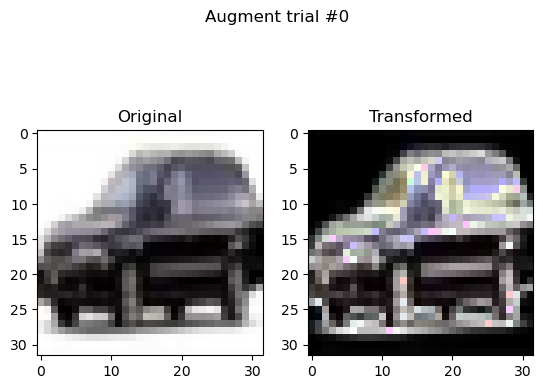

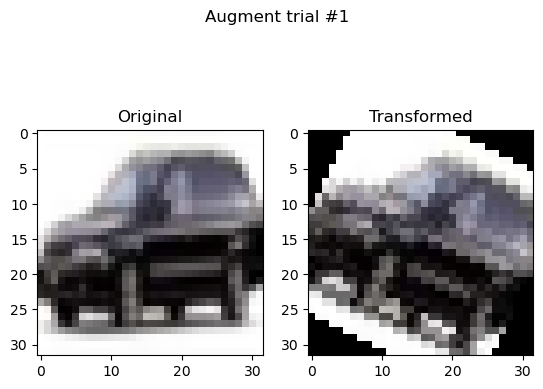

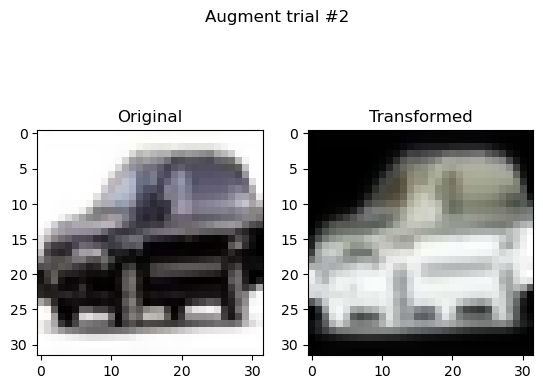

In [25]:
for i in range(3):
    img_t = custom_transforms(img) # AutoAugment된 이미지 텐서
    plt.subplot(121)
    plt.imshow(img); plt.title('Original')
    plt.subplot(122)
    plt.imshow(img_t.permute(1,2,0)); plt.title('Transformed')
    plt.suptitle(f'Augment trial #{i}')
    plt.show()